# IA aplicada a Data Science: Utilizando IA en la construcción de visualizaciones de datos

## Conociendo los datos

Zoop es una gran minorista que atiende a todas las regiones de México a través de su e-commerce. Es conocida por la amplia variedad de productos que ofrece, buscando satisfacer a todo tipo de público. Posee una serie de centros de distribución (CDs) para la entrega de sus productos, la mayoría de ellos situados en el estado de Mexico.

Para gestionar su alcance, así como la facturación de su sector en tiendas online, consolida los datos en diferentes períodos de tiempo y evalúa estos datos para generar insights y tomar decisiones estratégicas en su negocio. En este proyecto, tendremos acceso a los datos de parte de su clientela de e-commerce durante el año 2023.

Tú, como analista de datos de la empresa, necesitarás generar visualizaciones que ayuden en la elaboración de informes de acuerdo con algunas premisas proporcionadas por las partes interesadas, realizando un rápido análisis de la clientela que tenemos en la tienda virtual y de la facturación de la empresa.

**Problema de negocio:**

El equipo de datos de Zoop necesita extraer los datos y generar información a través de visuales que puedan presentarse a la directiva de la empresa, destacando los datos de facturación, perfil del cliente y otros indicadores que puedan ayudar en la toma de decisiones en su tienda online.

**Base de datos**

Vamos a importar dos bases de datos:

Datos de los clientes del e-commerce de Zoop, separados por el código identificador de la compra.

Datos de ventas del e-commerce de Zoop en 2023, separados por el código identificador de la compra.

Estos datos se leerán desde el repositorio compartido en GitHub.

**Desafío**

Tú, como analista de datos del equipo de datos de Zoop, tienes el desafío de extraer los datos de ambas bases y construir visualizaciones que puedan agregar valor a la presentación de los resultados de Zoop en 2023. Para ello, se te presentarán 7 preguntas para que puedas contribuir en la construcción del storytelling de las ventas de la empresa.

Para agilizar el proceso de análisis exploratorio de datos (AED) y la creación de visuales, utilizaremos la IA de ChatGPT como nuestra asistente, teniendo en cuenta el corto plazo para los análisis y la calidad de la entrega.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

### 1.2 Obteniendo los datos

In [2]:
url_clientes = "https://gist.githubusercontent.com/ahcamachod/d08898e1cc84c7271856e78d9558ca3d/raw/2f7e1fa53711efe6433a5c5ec79948f600591cb9/clientes_zoop.csv"
url_ventas = "https://gist.githubusercontent.com/ahcamachod/966d7162a3c3a2769b8770b35abf1bcc/raw/d79941b3fa46a450f3611589abd8663399c1277b/ventas_zoop.csv"

In [3]:
clientes = pd.read_csv(url_clientes)
clientes.head()

,ID_compra,ID_cliente,ciudad,estado,region,edad,sexo_biologico,cashback,nota
0,904,8972,Oaxaca de Juárez,Oaxaca,Sur,49,Masculino,No,9
1,4613,5120,Ciudad de México,Ciudad de México,Centro,49,Femenino,No,9
2,5579,1847,Ciudad de México,Ciudad de México,Centro,24,Femenino,No,8
3,2405,2846,Ciudad de México,Ciudad de México,Centro,38,Femenino,Sí,7
4,2485,2715,Chihuahua,Chihuahua,Noroeste,30,Femenino,No,10


In [4]:
ventas = pd.read_csv(url_ventas)
ventas.tail()

,ID_compra,fecha,horario,categoria,precio_unitario,cantidad,envio,metodo_pago
6164,6141,2023-12-31,17:49,Electrodomésticos,1509.9,5,377.48,Tarjeta de Crédito
6165,6148,2023-12-31,23:02,Papelería y oficina,14.0,2,3.36,Transferencia
6166,6123,2023-12-31,21:25,Alimentos y bebidas,77.9,1,7.79,Tarjeta de Crédito
6167,6147,2023-12-31,21:38,Libros,142.9,4,17.15,Tarjeta de Crédito
6168,6122,2023-12-31,22:11,Belleza e higiene,89.9,5,13.48,Tarjeta de Crédito


### 1.3 Entendiendo los datos

Ahora, vamos a explorar los datos comprendiendo lo que significan y cómo podemos relacionarlos en la construcción de las visualizaciones.

#### Prompt clientes

Vamos a actuar como analistas de datos de una e-commerce. Recibimos dos bases de datos con los datos de los clientes y de las ventas en 2023, respectivamente.

En este primer momento, vamos a explorar la base de clientes en formato de un DataFrame de pandas, llamado "clientes". Contiene datos de los clientes que realizaron compras en la tienda virtual, siendo estos: ID de la compra, ID del cliente, la ciudad, estado y región de la compra, edad, sexo biológico, si participan en el programa de cashback y la calificación, o nota, de la compra.

Queremos hacer una breve exploración de los datos para comprender un poco sobre ellos. Recordando que los datos de esta base ya están limpios y tratados. Construye el código para ejecutar esta etapa utilizando Python con el objetivo de conocer mejor el dataframe "clientes" y algunos de sus atributos.

No es necesario utilizar "print()" para mostrar el resultado de las consultas.

#### La respuesta de la IA fue la siguiente

##### Ver las primeras filas del DataFrame
clientes.head()

##### Ver la estructura general: cantidad de filas, columnas, tipos de datos
clientes.info()

##### Estadísticas descriptivas de columnas numéricas como edad y nota de compra
clientes.describe()

##### Revisar la cantidad de valores únicos por columna categórica
clientes[['ID_compra', 'ID_cliente', 'ciudad', 'estado', 'región', 'sexo', 'cashback']].nunique()

##### Ver distribución de los clientes por región
clientes['región'].value_counts()

##### Distribución por estado
clientes['estado'].value_counts()

##### Proporción de clientes por sexo
clientes['sexo'].value_counts(normalize=True)

##### Distribución de edad
clientes['edad'].describe()

##### Histograma de la edad (si se desea visualizar)
clientes['edad'].hist(bins=10)

##### Proporción de clientes que participan en cashback
clientes['cashback'].value_counts(normalize=True)

##### Media de la calificación (nota) por región
clientes.groupby('región')['nota'].mean().sort_values(ascending=False)

##### Edad promedio por región
clientes.groupby('región')['edad'].mean().sort_values()

##### Calificación promedio según participación en cashback
clientes.groupby('cashback')['nota'].mean()

##### Calificación promedio según sexo
clientes.groupby('sexo')['nota'].mean()


In [5]:
#1 Ver las primeras filas del DataFrame
clientes.head()

,ID_compra,ID_cliente,ciudad,estado,region,edad,sexo_biologico,cashback,nota
0,904,8972,Oaxaca de Juárez,Oaxaca,Sur,49,Masculino,No,9
1,4613,5120,Ciudad de México,Ciudad de México,Centro,49,Femenino,No,9
2,5579,1847,Ciudad de México,Ciudad de México,Centro,24,Femenino,No,8
3,2405,2846,Ciudad de México,Ciudad de México,Centro,38,Femenino,Sí,7
4,2485,2715,Chihuahua,Chihuahua,Noroeste,30,Femenino,No,10


In [6]:
#2 Ver la estructura general: cantidad de filas, columnas, tipos de datos
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6169 entries, 0 to 6168
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID_compra       6169 non-null   int64 
 1   ID_cliente      6169 non-null   int64 
 2   ciudad          6169 non-null   object
 3   estado          6169 non-null   object
 4   region          6169 non-null   object
 5   edad            6169 non-null   int64 
 6   sexo_biologico  6169 non-null   object
 7   cashback        6169 non-null   object
 8   nota            6169 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 433.9+ KB


In [7]:
#3 Estadísticas descriptivas de columnas numéricas como edad y nota de compra
clientes.describe()

,ID_compra,ID_cliente,edad,nota
count,6169.000000,6169.000000,6169.000000,6169.000000
mean,3085.000000,5461.475280,38.260010,8.443670
std,1780.981237,2610.959977,9.838951,1.730584
min,1.000000,1005.000000,18.000000,0.000000
25%,1543.000000,3148.000000,31.000000,8.000000
50%,3085.000000,5436.000000,38.000000,9.000000
75%,4627.000000,7748.000000,45.000000,9.000000
max,6169.000000,9999.000000,70.000000,10.000000


In [8]:
#4 Revisar la cantidad de valores únicos por columna categórica
clientes[['ID_compra', 'ID_cliente', 'ciudad', 'estado', 'region', 'sexo_biologico', 'cashback']].nunique()

,0
ID_compra,6169
ID_cliente,4453
ciudad,94
estado,28
region,9
sexo_biologico,2
cashback,2


In [9]:
#5 Ver distribución de los clientes por región
clientes['region'].value_counts()

,count
region,
Centro,1540
Noroeste,1276
Noreste,907
Occidente,556
Centro-Norte,533
Golfo,411
Centro-Sur,383
Sur,284
Sureste,279


In [10]:
#6 Distribución por estado
clientes['estado'].value_counts()

,count
estado,
Estado de México,1042
Nuevo León,570
Jalisco,478
Ciudad de México,458
Chihuahua,453
Veracruz,411
Puebla,383
Sonora,329
Guanajuato,284


In [11]:
#7 Proporción de clientes por sexo
clientes['sexo_biologico'].value_counts(normalize=True)

,proportion
sexo_biologico,
Femenino,0.546442
Masculino,0.453558


In [12]:
#8 Distribución de edad
clientes['edad'].describe()

,edad
count,6169.000000
mean,38.260010
std,9.838951
min,18.000000
25%,31.000000
50%,38.000000
75%,45.000000
max,70.000000


<Axes: >

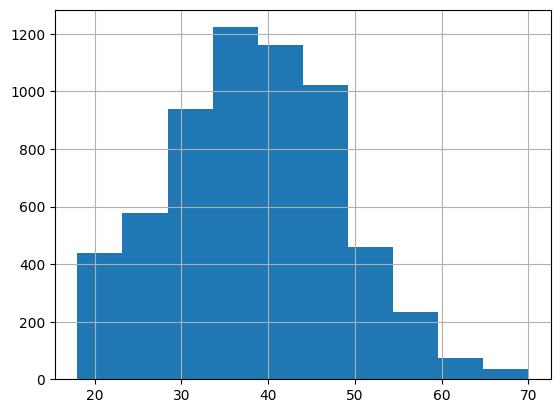

In [13]:
#9 Histograma de la edad (si se desea visualizar)
clientes['edad'].hist(bins=10)

In [14]:
#10 Proporción de clientes que participan en cashback
clientes['cashback'].value_counts(normalize=True)

,proportion
cashback,
No,0.576593
Sí,0.423407


In [15]:
#11 Media de la calificación (nota) por región
clientes.groupby('region')['nota'].mean().sort_values(ascending=False)

,nota
region,
Sureste,8.591398
Noreste,8.543550
Centro-Norte,8.465291
Sur,8.457746
Occidente,8.456835
Centro,8.419481
Noroeste,8.408307
Centro-Sur,8.389034
Golfo,8.318735


In [16]:
# Edad promedio por región
clientes.groupby('region')['edad'].mean().sort_values()

,edad
region,
Centro-Sur,37.704961
Noreste,37.977949
Occidente,38.021583
Noroeste,38.115204
Centro-Norte,38.238274
Sur,38.253521
Sureste,38.390681
Golfo,38.632603
Centro,38.655844


In [17]:
# Calificación promedio según participación en cashback
clientes.groupby('cashback')['nota'].mean()

,nota
cashback,
No,8.443632
Sí,8.443721


In [18]:
# Calificación promedio según sexo
clientes.groupby('sexo_biologico')['nota'].mean()

,nota
sexo_biologico,
Femenino,8.489172
Masculino,8.388849


#### Prompt ventas

Ahora vamos explorar la base de ventas en formato de un DataFrame, llamado "ventas". Contiene datos de las ventas del comercio electrónico, que son: ID de la compra, fecha de la compra, hora de la compra, categoría del producto, precio unitario del producto, cantidad vendida, envío y el método de pago.

Queremos hacer una breve exploración de los datos para comprender un poco sobre ellos. Recordando que los datos de esta base también están limpios y tratados. Construye el código para ejecutar esta etapa utilizando Python con el objetivo de conocer mejor el dataframe "clientes" y algunos de sus atributos.

In [19]:
#1 Ver las primeras filas del DataFrame
ventas.head()

,ID_compra,fecha,horario,categoria,precio_unitario,cantidad,envio,metodo_pago
0,6,2023-01-03,20:40,Electrónicos,4457.9,4,713.26,Paypal
1,5,2023-01-03,21:48,Herramientas y construcción,115.9,1,0.00,Transferencia
2,9,2023-01-03,17:08,Belleza e higiene,68.9,2,13.78,Tarjeta de Crédito
3,4,2023-01-03,14:29,Herramientas y construcción,80.9,5,40.45,Transferencia
4,8,2023-01-03,18:02,Belleza e higiene,165.0,4,0.00,Transferencia


In [20]:
#2 Ver la estructura general del DataFrame
ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6169 entries, 0 to 6168
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID_compra        6169 non-null   int64  
 1   fecha            6169 non-null   object 
 2   horario          6169 non-null   object 
 3   categoria        6169 non-null   object 
 4   precio_unitario  6169 non-null   float64
 5   cantidad         6169 non-null   int64  
 6   envio            6169 non-null   float64
 7   metodo_pago      6169 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 385.7+ KB


In [21]:
#3 Estadísticas descriptivas de columnas numéricas como precio, cantidad y envío
ventas[['precio_unitario', 'cantidad', 'envio']].describe()

,precio_unitario,cantidad,envio
count,6169.000000,6169.000000,6169.000000
mean,873.234738,3.004863,119.233832
std,1852.064342,1.420725,366.149225
min,2.900000,1.000000,0.000000
25%,44.900000,2.000000,0.320000
50%,93.900000,3.000000,7.550000
75%,221.900000,4.000000,29.240000
max,8000.000000,5.000000,4521.540000


In [22]:
#4 Revisar las categorías de productos más vendidas
ventas['categoria'].value_counts()

,count
categoria,
Alimentos y bebidas,1495
Belleza e higiene,1062
Casa y aseo,1041
Electrodomésticos,665
Electrónicos,580
Papelería y oficina,551
Herramientas y construcción,474
Libros,301


In [23]:
#5 Métodos de pago más utilizados
ventas['metodo_pago'].value_counts(normalize=True)

,proportion
metodo_pago,
Tarjeta de Crédito,0.462149
Transferencia,0.363754
Tarjeta de Débito,0.088669
Paypal,0.085427


In [24]:
#6 Venta total por categoría (precio_unitario * cantidad_vendida)
ventas['venta_total'] = ventas['precio_unitario'] * ventas['cantidad']
ventas.groupby('categoria')['venta_total'].sum().sort_values(ascending=False)

,venta_total
categoria,
Electrónicos,10547410.0
Electrodomésticos,4351368.5
Belleza e higiene,423262.9
Casa y aseo,316688.6
Herramientas y construcción,252953.1
Alimentos y bebidas,231284.3
Libros,75265.0
Papelería y oficina,45221.6


In [25]:
#7 Envío promedio por categoría
ventas.groupby('categoria')['envio'].mean().sort_values()

,envio
categoria,
Papelería y oficina,3.662468
Alimentos y bebidas,6.942408
Libros,10.349635
Casa y aseo,13.782450
Belleza e higiene,17.313390
Herramientas y construcción,24.470422
Electrodomésticos,296.576376
Electrónicos,824.973672


In [26]:
#8 Análisis de la cantidad vendida por producto
ventas['cantidad'].describe()

,cantidad
count,6169.000000
mean,3.004863
std,1.420725
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


In [27]:
#9 Conversión de fecha a tipo datetime (si no lo está ya)
ventas['fecha'] = pd.to_datetime(ventas['fecha'], format='%Y-%m-%d')

In [28]:
#10 Ver rango de fechas del dataset
ventas['fecha'].min(), ventas['fecha'].max()

(Timestamp('2023-01-03 00:00:00'), Timestamp('2023-12-31 00:00:00'))

In [29]:
#11 Ventas totales por mes (puede ser útil para tendencias)
ventas['mes'] = ventas['fecha'].dt.to_period('M')
ventas.groupby('mes')['venta_total'].sum()

,venta_total
mes,
2023-01,562809.3
2023-02,427070.7
2023-03,545026.9
2023-04,530421.8
2023-05,1535586.0
2023-06,1474482.4
2023-07,774310.9
2023-08,1953744.5
2023-09,786699.7


In [30]:
#12 Horas con más compras
ventas['horario'].value_counts().sort_index()

,count
horario,
00:00,9
00:01,8
00:02,10
00:03,16
00:04,14
...,...
23:55,18
23:56,26
23:57,16


In [31]:
#13 Resumen estadístico de las columnas númerica
ventas.describe()

,ID_compra,fecha,precio_unitario,cantidad,envio,venta_total
count,6169.000000,6169,6169.000000,6169.000000,6169.000000,6169.000000
mean,3085.000000,2023-08-20 00:12:22.292105984,873.234738,3.004863,119.233832,2633.077322
min,1.000000,2023-01-03 00:00:00,2.900000,1.000000,0.000000,2.900000
25%,1543.000000,2023-05-30 00:00:00,44.900000,2.000000,0.320000,104.500000
50%,3085.000000,2023-08-31 00:00:00,93.900000,3.000000,7.550000,263.600000
75%,4627.000000,2023-11-23 00:00:00,221.900000,4.000000,29.240000,746.700000
max,6169.000000,2023-12-31 00:00:00,8000.000000,5.000000,4521.540000,39884.500000
std,1780.981237,NaN,1852.064342,1.420725,366.149225,6300.467095


### 1.3 Tipos de gráficos

#### Prompt:
Ahora vamos a unir las dos bases de nuestro proyecto en una sola utilizando como llave la columna "ID_compra". Además, organizaremos las columnas en la siguiente secuencia:

ID_compra
fecha
horario
categoria
precio_unitario
cantidad
envio
metodo_pago
ID_cliente
edad
sexo_biologico
ciudad
estado
region
cashback
nota
Construye un código para ejecutar esta etapa usando Python y la biblioteca Pandas.

In [32]:
# Realizar la unión de los DataFrames por ID_compra
df = pd.merge(ventas, clientes, on='ID_compra', how='inner')

In [33]:
# Ordenar las columnas en el orden deseado

df = df[['ID_compra','fecha','horario','categoria','precio_unitario','cantidad','envio',
      'metodo_pago','ID_cliente','edad','sexo_biologico','ciudad','estado','region',
      'cashback','nota']]

# Mostrar las primeras filas de DataFrame unificado
display(df.head())

,ID_compra,fecha,horario,categoria,precio_unitario,cantidad,envio,metodo_pago,ID_cliente,edad,sexo_biologico,ciudad,estado,region,cashback,nota
0,6,2023-01-03,20:40,Electrónicos,4457.9,4,713.26,Paypal,6149,30,Masculino,Hermosillo,Sonora,Noroeste,Sí,10
1,5,2023-01-03,21:48,Herramientas y construcción,115.9,1,0.00,Transferencia,9491,36,Masculino,Ciudad de México,Ciudad de México,Centro,Sí,8
2,9,2023-01-03,17:08,Belleza e higiene,68.9,2,13.78,Tarjeta de Crédito,5288,39,Femenino,Aguascalientes,Aguascalientes,Centro-Norte,No,7
3,4,2023-01-03,14:29,Herramientas y construcción,80.9,5,40.45,Transferencia,9679,35,Masculino,Veracruz,Veracruz,Golfo,Sí,9
4,8,2023-01-03,18:02,Belleza e higiene,165.0,4,0.00,Transferencia,1380,50,Masculino,Ciudad de México,Ciudad de México,Centro,No,9


#### Prompt

Ahora con nuestro "df" ya construido a partir de las dos bases del proyecto, vamos a iniciar un nuevo proceso. Queremos comenzar la etapa de generación de visuales que puedan ayudar en el análisis de la facturación a lo largo del año, el perfil del cliente y otros datos que puedan ser relevantes para el análisis y la construcción de nuestra narrativa.

Las columnas de "df" son:

ID_compra: número único asignado a la compra realizada, en formato int
fecha: fecha de la compra, en formato datetime
horario: hora de la compra, en formato object
categoria: categoría del producto, en formato object
precio_unitario: precio de una unidad del producto, en formato float
cantidad: cantidad vendida del producto, en formato int
envio: costo de envío a ser pagado en total de la compra, en formato float
metodo_pago: método de pago de la compra, en formato object
ID_cliente: número único asignado al cliente, en formato int
edad: edad del cliente, en formato int
sexo_biologico: sexo biológico del cliente, en formato object
ciudad: ciudad del cliente, en formato object
estado: estado del cliente, en formato object
region: región del cliente, en formato object
cashback: si el cliente participa o no en el programa de cashback de la tienda, en formato object
nota: evaluación del cliente por la compra, en formato int
El objetivo es abstraer y buscar relaciones para construir visualizaciones interesantes para el análisis de los datos de los clientes y ventas de Zoop.

#### Sugerencias de visualizaciones

1. Análisis de facturación a lo largo del año
1.1 Facturación mensual total

In [34]:
df['mes'] = df['fecha'].dt.to_period('M').astype(str)
df['facturacion'] = df['precio_unitario'] * df['cantidad']

facturacion_mes = df.groupby('mes')['facturacion'].sum().reset_index()

fig1 = px.line(facturacion_mes, x='mes', y='facturacion', markers=True,
               title='📈 Facturación mensual en 2023',
               labels={'mes': 'Mes', 'facturacion': 'Facturación Total'})
fig1.show()

1.2 Facturación por categoría

In [35]:
categoria_fact = df.groupby('categoria')['facturacion'].sum().reset_index().sort_values('facturacion', ascending=False)

fig2 = px.bar(categoria_fact, x='categoria', y='facturacion',
              title='🛍️ Facturación total por categoría de producto',
              labels={'categoria': 'Categoría', 'facturacion': 'Facturación'})
fig2.show()


2. Perfil del cliente
2.1 Distribución por edad

In [36]:
fig3 = px.histogram(df, x='edad', nbins=20,
                    title='🎂 Distribución de edades de los clientes',
                    labels={'edad': 'Edad'})
fig3.show()


2.2 Participación en cashback por región

In [37]:
cashback_region = df.groupby(['region', 'cashback']).size().reset_index(name='conteo')

fig4 = px.bar(cashback_region, x='region', y='conteo', color='cashback',
              barmode='group',
              title='💰 Participación en programa de cashback por región',
              labels={'region': 'Región', 'conteo': 'Número de clientes'})
fig4.show()


2.3 Sexo biológico y nota promedio

In [38]:
nota_sexo = df.groupby('sexo_biologico')['nota'].mean().reset_index()

fig5 = px.bar(nota_sexo, x='sexo_biologico', y='nota',
              title='⭐ Nota promedio por sexo biológico',
              labels={'sexo_biologico': 'Sexo', 'nota': 'Nota promedio'})
fig5.show()


3. Otros insights relevantes

  3.1 Horas con más compras

In [39]:
fig7 = px.pie(df, names='metodo_pago',
              title='💳 Distribución de métodos de pago',
              hole=0.4)
fig7.show()


3.2 Evaluaciones promedio por región

In [40]:
nota_region = df.groupby('region')['nota'].mean().reset_index()

fig8 = px.bar(nota_region, x='region', y='nota',
              title='📍 Nota promedio por región',
              labels={'region': 'Región', 'nota': 'Nota promedio'})
fig8.show()


4 Análisis de correlación

In [41]:
import plotly.graph_objects as go

# Preparar DataFrame para correlación
df_corr = df.copy()

# Crear columna de facturación
df_corr['facturacion'] = df_corr['precio_unitario'] * df_corr['cantidad']

# Codificar variables categóricas
df_corr['sexo_biologico'] = df_corr['sexo_biologico'].map({'Femenino': 0, 'Masculino': 1})
df_corr['cashback'] = df_corr['cashback'].map({'No': 0, 'Sí': 1})
df_corr = pd.get_dummies(df_corr, columns=['metodo_pago', 'region'], drop_first=True)

# Seleccionar columnas relevantes
columnas_interes = [
    'edad',
    'nota',
    'cantidad',
    'precio_unitario',
    'facturacion',
    'envio',
    'sexo_biologico',
    'cashback'
] + [col for col in df_corr.columns if col.startswith('metodo_pago_') or col.startswith('region_')]

# Calcular matriz de correlación
df_corr_sub = df_corr[columnas_interes]
matriz_corr = df_corr_sub.corr().round(2)

# Crear mapa de calor con Plotly
fig = go.Figure(data=go.Heatmap(
    z=matriz_corr.values,
    x=matriz_corr.columns,
    y=matriz_corr.index,
    colorscale='RdBu',
    zmin=-1, zmax=1,
    colorbar=dict(title='Correlación'),
    hoverongaps=False
))

fig.update_layout(
    title='Mapa de Calor de Correlación entre Variables',
    xaxis_nticks=len(matriz_corr.columns),
    yaxis_nticks=len(matriz_corr.index),
    autosize=True,
    margin=dict(l=80, r=80, t=100, b=80)
)

fig.show()

## 2.1 Definiendo las visualizaciones

Después de la etapa de exploración de los datos, vamos a leer las preguntas que se plantearon en la demanda que recibimos. Así, comenzaremos a pensar en los visuales que vamos a construir con la ayuda de la IA.

Preguntas
Ventas
¿Cuáles fueron los métodos de pago más utilizados en 2023?
¿Cuál fue la facturación por categoría en 2023?
¿Cómo fueron las ventas a lo largo de los meses en 2023?
¿Cómo se divide la venta por trimestre por método de pago? ¿Existe un período en que algún tipo de pago se destaca?
Perfil del cliente
¿Cuál es la proporción de la clientela que participa en nuestro programa de cashback?
¿Cómo están distribuidas las evaluaciones del producto? ¿Tenemos buenos números generales?
¿Cómo se distribuye nuestro público por edad y sexo biológico? ¿Existe un grupo que se destaca?
Inicialmente, vamos a hacer la primera versión de los gráficos, aún no refinados con los elementos visuales, para más adelante ir añadiendo las diversas técnicas de storytelling.

### 1ra Pregunta: ¿Cuáles fueron los métodos de pago más utilizados en 2023?
Le vamos pedir a ChatGPT que nos auxilie en la construcción de este visual. Primero, trataremos los datos generando una tabla resumida (que también es una especie de visual) y luego construiremos el primer gráfico.

**PROMPT**

Tenemos un DataFrame llamado "df" y queremos construir un visual que presente cuáles métodos de pago fueron los más utilizados.

En "df", tenemos la columna "metodo_pago" con los 4 tipos de pago utilizados en la compra.

Inicialmente, queremos construir una tabla llamada "metodos_de_pago" que resuma los datos de esta columna y, a continuación, deseamos crear una visualización que muestre la cantidad de esos métodos de pago presentes en la tabla "metodo_pago".

Utiliza las bibliotecas de visualización de datos de Python para crear esta visualización.

In [42]:
# Crear tabla resumen de métodos de pago
metodos_de_pago = df['metodo_pago'].value_counts().reset_index()
metodos_de_pago.columns = ['metodo_pago', 'cantidad']

print(metodos_de_pago)

          metodo_pago  cantidad
0  Tarjeta de Crédito      2851
1       Transferencia      2244
2   Tarjeta de Débito       547
3              Paypal       527


In [43]:
metodos_de_pago

,metodo_pago,cantidad
0,Tarjeta de Crédito,2851
1,Transferencia,2244
2,Tarjeta de Débito,547
3,Paypal,527


In [44]:
import plotly.express as px

fig = px.bar(metodos_de_pago,
             x='metodo_pago',
             y='cantidad',
             color='metodo_pago',
             text='cantidad',
             title='Cantidad de métodos de pago utilizados')

fig.update_layout(xaxis_title='Método de Pago',
                  yaxis_title='Cantidad',
                  showlegend=False)

fig.show()

### 2da Pregunta: ¿Cuál fue la facturación por categoria em 2023?
Observación: Para la facturación, consideraremos aquí el producto entre el precio unitario y la cantidad, sumados al costo de envío de cada producto.

**PROMPT**

Tenemos un DataFrame llamado "df" y queremos construir un gráfico de barras horizontales que muestre la facturación por categoría de Zoop.

En "df", tenemos las siguientes columnas:

categoria: categorías de los productos
precio_unitario: precio de una unidad del producto
cantidad: cantidad vendida del producto
envio: costo de envío total de la compra.
Deseamos crear una visualización que muestre la facturación de cada categoría, donde la facturación se calcula multiplicando el precio unitario por la cantidad y sumando el costo de envío.

Utiliza las bibliotecas de visualización de datos de Python para crear esta visualización.

In [45]:
# Crear columna de facturación total por fila
df['facturacion'] = (df['precio_unitario'] * df['cantidad']) + df['envio']

# Agrupar por categoría y sumar la facturación
facturacion_categoria = df.groupby('categoria')['facturacion'].sum().reset_index()

# Ordenar de mayor a menor facturación
facturacion_categoria = facturacion_categoria.sort_values(by='facturacion', ascending=True)

In [46]:
fig = px.bar(facturacion_categoria,
             x='facturacion',
             y='categoria',
             orientation='h',
             color='facturacion',
             text='facturacion',
             title='Facturación por Categoría de Productos')

fig.update_layout(xaxis_title='Facturación ($)',
                  yaxis_title='Categoría',
                  coloraxis_showscale=False)

fig.update_traces(texttemplate='$%{text:.2f}', textposition='outside')

fig.show()

### 3a Pregunta: ¿Cómo fueron las ventas a lo largo de los meses en 2023?

**PROMPT**

Tenemos un DataFrame llamado "df" y queremos construir un gráfico de líneas que muestre las ventas totales mensuales de Zoop.

En "df", tenemos las siguientes columnas:

fecha: con las fechas de las compras en formato datetime (aaaa-mm-dd)

facturación: calculada como el producto del precio unitario y la cantidad, sumado al costo de envío de cada venta.

Deseamos crear una visualización que muestre las ventas por mes. Primero, agrupa los datos por mes y luego crea una nueva columna llamada "mes" que contenga el nombre de cada mes, traduciendo los meses del índice mediante el siguiente diccionario. Utiliza la columna "fecha" para agrupar los datos y construir el gráfico. La columna "mes" solo debe usarse para cambiar las etiquetas del eje x.

meses = {
    'January': 'Ene',
    'February': 'Feb',
    'March': 'Mar',
    'April': 'Abr',
    'May': 'May',
    'June': 'Jun',
    'July': 'Jul',
    'August': 'Ago',
    'September': 'Sep',
    'October': 'Oct',
    'November': 'Nov',
    'December': 'Dic'
}
Utiliza las bibliotecas de visualización de datos de Python para crear esta visualización.

In [47]:
# Diccionario de traducción de meses
meses = {
    'January': 'Ene', 'February': 'Feb', 'March': 'Mar',
    'April': 'Abr', 'May': 'May', 'June': 'Jun',
    'July': 'Jul', 'August': 'Ago', 'September': 'Sep',
    'October': 'Oct', 'November': 'Nov', 'December': 'Dic'
}

# Aseguramos que 'fecha' sea tipo datetime
df['fecha'] = pd.to_datetime(df['fecha'])

# Agrupar por año-mes y sumar facturación
df_mensual = df.groupby(df['fecha'].dt.to_period('M'))['facturacion'].sum().reset_index()

# Convertir el periodo a fecha (inicio del mes)
df_mensual['fecha'] = df_mensual['fecha'].dt.to_timestamp()

# Extraer nombre del mes en inglés y traducirlo
df_mensual['mes'] = df_mensual['fecha'].dt.strftime('%B').map(meses)

# Para orden cronológico, creamos etiqueta personalizada con año + mes abreviado
df_mensual['etiqueta_mes'] = df_mensual['fecha'].dt.strftime('%Y-') + df_mensual['mes']


In [48]:
fig = px.line(df_mensual,
              x='etiqueta_mes',
              y='facturacion',
              markers=True,
              text='facturacion',
              title='Ventas Totales Mensuales - Zoop',
              labels={'etiqueta_mes': 'Mes', 'facturacion': 'Facturación ($)'})

fig.update_traces(texttemplate='$%{text:.2f}', textposition='top center')

fig.update_layout(xaxis_title='Mes',
                  yaxis_title='Facturación',
                  xaxis_tickangle=45)

fig.show()


## 2.3 - Componiendo datos dinámicos

Construimos algunos visuales interesantes para comparar los datos, mostrando las facturaciones de Zoop. Ahora, pasemos a una nueva categoría de visuales: composición.

Vamos a hacer una composición dinámica de los datos. Para ello, añadiremos más variables al análisis, incorporando 3 variables diferentes, siendo una de ellas categórica.

### 4a Pregunta: ¿Cómo está dividida la venta por trimestre por método de pago? ¿Existe algún período en el que algún tipo de pago se destaque?

**PROMPT**

Tenemos un DataFrame llamado "df" y queremos construir un gráfico de barras apiladas que muestre las ventas por trimestre en relación con el método de pago de Zoop.

En "df", tenemos las siguientes columnas:

fecha: con las fechas de las compras en formato datetime (aaaa-mm-dd)
facturacion: con los valores de las ventas
metodo_pago: con el método de pago elegido en la compra
Deseamos crear una visualización que muestre las ventas por trimestre, agrupando los métodos de pago de cada trimestre correspondientes a cada compra

In [49]:
# Aseguramos que la columna 'fecha' sea tipo datetime
df['fecha'] = pd.to_datetime(df['fecha'])

# Creamos una nueva columna con el nombre del trimestre
df['trimestre'] = df['fecha'].dt.to_period('Q').astype(str)

# Agrupamos por trimestre y método de pago, y sumamos la facturación
ventas_trimestre = df.groupby(['trimestre', 'metodo_pago'])['facturacion'].sum().reset_index()

ventas_trimestre

,trimestre,metodo_pago,facturacion
0,2023Q1,Paypal,159392.78
1,2023Q1,Tarjeta de Crédito,567801.62
2,2023Q1,Tarjeta de Débito,160984.48
3,2023Q1,Transferencia,716355.57
4,2023Q2,Paypal,408176.22
5,2023Q2,Tarjeta de Crédito,1675152.84
6,2023Q2,Tarjeta de Débito,271050.18
7,2023Q2,Transferencia,1351769.42
8,2023Q3,Paypal,323562.78
9,2023Q3,Tarjeta de Crédito,1899375.64


In [50]:
import plotly.express as px

fig = px.bar(ventas_trimestre,
             x='trimestre',
             y='facturacion',
             color='metodo_pago',
             text_auto='.2s',
             title='Ventas por Trimestre y Método de Pago - Zoop')

fig.update_layout(
    xaxis_title='Trimestre',
    yaxis_title='Facturación Total',
    barmode='stack',  # Esto asegura que las barras estén apiladas
    legend_title='Método de Pago'
)

fig.show()


El gráfico de columnas apiladas añade a la comparación entre períodos o categorías, la comparación también entre los datos de cada período/categoría. Es como si pusiéramos una "lupa" en cada columna y visualizáramos la composición de cada una de acuerdo con la variable deseada (aquí, las formas de pago).

Siéntete libre de formular algunas hipótesis sobre las ventas por trimestre combinadas con el tipo de pago y qué ideas podemos obtener de esta base de datos.

## 3.1 - Componiendo datos estáticos

### 5ª Pregunta: ¿Cuál es la proporción de la clientela que participa en nuestro programa de cashback?

**PROMPT**

Tenemos un DataFrame llamado "df" y queremos construir un gráfico que muestre la proporción de usuarios(as) que están participando en el programa de cashback de Zoop.

En "df", tenemos la columna "cashback" que contiene estos datos.

Utiliza las bibliotecas de visualización de datos de Python para crear esta visualización.

In [51]:
# Contar cuántos usuarios participan y cuántos no
cashback_counts = df['cashback'].value_counts().reset_index()
cashback_counts.columns = ['participa_cashback', 'cantidad']

In [52]:
fig = px.pie(cashback_counts,
             names='participa_cashback',
             values='cantidad',
             title='Proporción de Usuarios en el Programa de Cashback',
             color='participa_cashback',
             color_discrete_map={
                 'Sí': '#2ca02c',   # Verde
                 'No': '#d3d3d3'    # Gris claro
             })

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

**Prompt**:
¿Podrías utilizar el color rojo y mantener el azul y cambiar el gráfico anterior a uno tipo rosquilla?

Utiliza las bibliotecas de visualización de datos de Python para crear esta visualización.

In [53]:
# Crear gráfico tipo rosquilla
fig = px.pie(cashback_counts,
             names='participa_cashback',
             values='cantidad',
             hole=0.5,  # Esto convierte el gráfico en rosquilla
             title='Participación en el Programa de Cashback',
             color='participa_cashback',
             color_discrete_map={
                 'Sí': '#1f77b4',   # Azul
                 'No': '#d62728'    # Rojo
             })

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

## 3.2 - Distribuyendo Datos

Con la ayuda de la IA, generaremos más gráficos que serán importantes para la construcción del storytelling del informe de Zoop, según lo solicitado. Ahora, partiendo de la distribución de datos, vamos a analizar el perfil de los clientes y cómo evalúan sus compras en Zoop.

### 6ª Pregunta: ¿Cómo están distribuidas las calificaciones de la compra? ¿Tenemos buenos números en general?

**PROMPT**

Tenemos un DataFrame llamado "df" y queremos construir un gráfico que muestre la distribución de las evaluaciones del público en relación con las compras realizadas en la tienda online.

En "df", tenemos la columna "nota" con las calificaciones otorgadas por cada usuario en relación con la compra que realizaron, que varían de 0 a 10 en números enteros.

Deseamos crear una visualización que muestre la distribución de estos datos.

Utiliza las bibliotecas de visualización de datos de Python para crear este gráfico.

In [54]:
fig = px.histogram(df,
                   x='nota',
                   nbins=11,  # Una barra por cada número del 0 al 10
                   title='Distribución de Calificaciones de los Usuarios',
                   labels={'nota': 'Calificación'},
                   color_discrete_sequence=['#1f77b4'])  # Azul

fig.update_layout(yaxis_title='Cantidad de Evaluaciones')
fig.show()

### 7ª Pregunta: ¿Cómo está distribuida nuestra audiencia por edad y sexo biológico? ¿Existe algún grupo que sobresalga?

**Prompt**

Tenemos un DataFrame llamado "df" y queremos construir un gráfico que muestre la distribución de nuestra audiencia por edad y sexo biológico.

En "df", tenemos las columnas:

edad: edad de la persona que realizó la compra
sexo_biologico: sexo biológico de la persona que realizó la compra, con datos categóricos
Deseamos crear una visualización que muestre la distribución de estos datos.

Utiliza las bibliotecas de visualización de datos de Python para crear esta visualización

In [55]:
fig = px.violin(df,
                x='sexo_biologico',
                y='edad',
                color='sexo_biologico',
                box=True,  # Agrega boxplot dentro
                points='all',  # Muestra puntos individuales
                title='Distribución de Edad por Sexo Biológico',
                labels={'edad': 'Edad', 'sexo_biologico': 'Sexo Biológico'},
                color_discrete_sequence=px.colors.qualitative.Set2)

fig.show()


In [56]:
fig = px.box(df,
             x='sexo_biologico',
             y='edad',
             color='sexo_biologico',
             title='Distribución de Edad por Sexo Biológico',
             labels={'edad': 'Edad', 'sexo_biologico': 'Sexo Biológico'},
             color_discrete_sequence=px.colors.qualitative.Set2)

fig.show()


## 4.1 Storytelling

### 4.1 Definiendo los colores del proyecto

Ahora, vamos a explorar la importancia de los colores en la visualización de datos, discutir cómo las personas perciben e interpretan la información visual, y abordar la diferencia entre la capacidad de la inteligencia artificial y la visión humana en lo que respecta a la elección de colores y accesibilidad.

In [57]:
# Adicionamos los colores al proyecto
ROJO_1,	ROJO_2,	ROJO_3 = "#e23155",	"#cc2c4e", "#b32742"
AZUL_1,	AZUL_2,	AZUL_3 = "#203f75",	"#1c3867", "#19325b"
BLANCO,GRIS_1, GRIS_2, GRIS_3, GRIS_4,	GRIS_5 = "#ffffff", "#ebebeb",	"#d9d9d9", "#cccccc", "#555655", "#231f20"
AQUA_1,	AQUA_2,	AQUA_3 = "#addcd4",	"#9fccc5", "#96bfb9"


#### ¿Por qué definimos nosotros mismos los colores del proyecto?

**1. Percepción humana de los colores:**

Nuestro cerebro interpreta los colores de manera única, asociando emociones y significados a cada tonalidad. Es importante, al elegir los colores para representar datos, considerar la percepción humana para asegurar que la información se transmita de manera clara y eficaz. Además de seguir la identidad visual de Zoop, es decir, dar esa sensación de que el visual es de Zoop.

**2. Accesibilidad**:

Ciertas combinaciones de colores pueden ser difíciles de percibir para personas con deficiencias visuales. Nuestra responsabilidad como desarrolladores es garantizar que nuestras visualizaciones sean inclusivas. Aquí seguiremos algunas directrices y recomendaciones para crear gráficos accesibles.

**3. IA vs. elección de colores:**

Mientras que la IA puede realizar tareas complejas, como análisis de datos y reconocimiento de patrones, aún no posee el discernimiento humano cuando se trata de elegir colores significativos y garantizar la accesibilidad. Aquí es donde entra nuestra intervención creativa y consideración humana.

**4. Experiencia visual:**

¿Las personas pueden entender la información transmitida por los gráficos? ¿Existe algún "conflicto" entre los colores que perjudica la claridad del mensaje? Vamos a explorar técnicas para mejorar la experiencia visual, como el contraste adecuado, la elección cuidadosa de los colores de la paleta y el destaque de elementos clave.

### 4.2 - Añadiendo etiquetas y rótulos

Ya hemos creado anteriormente los 7 visuales y definido los colores del proyecto. Ahora, vamos a elegir solo uno de los visuales para comprender cómo podemos utilizar la IA para agregar los colores ideales, las etiquetas de los datos, títulos y etiquetas de los ejes.

Entonces, tomaremos el código de ese primer gráfico (Métodos de pago utilizados) y exploraremos estos cambios a través de la utilización de la IA.

**PROMPT**

Ahora llegó el momento de refinar nuestras visualizaciones. Comencemos con el primer gráfico que hicimos, el de los métodos de pago.

Nuestro gráfico necesita seguir la identidad visual de Zoop, con el fondo de la figura y del gráfico en el color GRIS_1, las columnas en el color ROJO_1 y el tamaño de la figura debe ser de (10, 6).

El título de la figura es "Métodos de pago más utilizados en 2023" con tamaño 18 y su color GRIS_5.

Las etiquetas del eje y (yticks) deben ser suprimidas así como la etiqueta del eje y (ylabel) y las etiquetas, y la etiqueta del eje x (xticks y xlabel) deben tener tamaño 12 con el color AZUL_1. Los bordes superior, derecho e izquierdo del gráfico deben ser suprimidos.

Además, es necesario mostrar el total de cada método de pago encima de cada columna, con el texto también en el color AZUL_1 y tamaño 12.

Utiliza las bibliotecas de visualización de datos de Python para crear esta visualización. Recuerda que las variables de los colores que estamos utilizando tienen valores de colores ya en hexadecimal.

In [58]:

# Crear gráfico
fig = px.bar(metodos_de_pago,
             x='metodo_pago',
             y='cantidad',
             text='cantidad',
             title='Métodos de pago más utilizados en 2023',
             color_discrete_sequence=[ROJO_1])

# Actualizar diseño del gráfico
fig.update_layout(
    width=1000, height=600,  # Tamaño en píxeles equivalente a (10, 6) pulgadas
    plot_bgcolor=GRIS_1,
    paper_bgcolor=GRIS_1,
    title_font=dict(size=18, color=GRIS_5),
    showlegend=False,
    xaxis=dict(
        title='Método de Pago',
        title_font=dict(size=12, color=AZUL_1),
        tickfont=dict(size=12, color=AZUL_1),
        showline=False,
        showgrid=False
    ),
    yaxis=dict(
        title=None,
        tickvals=[],  # Elimina yticks
        showline=False,
        showgrid=False
    ),
    margin=dict(t=80, l=20, r=20, b=60)
)

# Eliminar bordes
fig.update_layout(
    xaxis_showline=False,
    yaxis_showline=False,
    xaxis_showticklabels=True,
    yaxis_showticklabels=False
)

# Actualizar etiquetas sobre barras
fig.update_traces(
    texttemplate='%{text}',
    textposition='outside',
    textfont=dict(size=12, color=AZUL_1),
    marker_color=ROJO_1
)

fig.show()

### 4.3 - Añadiendo textos

**PROMPT**

¡El gráfico quedó muy bien!

Ahora quiero añadir un texto dentro del área del gráfico, ¿vamos allá?

Para ello, suma los valores de las dos primeras columnas, divide por la suma de todas las columnas y convierte a formato de porcentaje, almacenando en la variable "porcentaje".

Ahora, en la posición x=1.5 y y=2500, añade el siguiente texto con tamaño 10 y color AZUL_3: f"
% de los clientes utilizan Tarjeta de Crédito o Transferencia \npara el pago. Sería interesante considerar asociaciones con \nbancos para la creación de un Zoop Pay con el fin de fidelizar \na nuestra clientela.".

In [59]:
# Calcular porcentaje
top2 = metodos_de_pago['cantidad'].iloc[:2].sum()
total = metodos_de_pago['cantidad'].sum()
porcentaje = round((top2 / total) * 100, 2)

In [60]:
fig.add_annotation(
    x=0.99, y=0.99,                  # Esquina superior derecha
    xref='paper', yref='paper',
    text=f"{porcentaje}% de los clientes utilizan Tarjeta de Crédito o Transferencia\n"
         "para el pago. Sería interesante considerar asociaciones con\n"
         "bancos para la creación de un Zoop Pay con el fin de fidelizar\n"
         "a nuestra clientela.",
    showarrow=False,
    font=dict(size=10, color=AZUL_3),
    align='right',
    xanchor='right',
    yanchor='top'
)


### 4.4 - Agregar elementos visuales

**Prompt**:


¿Vamos a explorar otro de los gráficos que hicimos? Ahora vamos a utilizar el de Ventas totales mensuales de Zoop. La variable que pasa los valores mensuales es:

ventas_mensuales = df.groupby(df['fecha'].dt.to_period('M'))['facturacion'].sum().reset_index()
Pero debes sustituirla por:

df['mes'] = df['fecha'].dt.strftime('%B')
ventas_mensuales = df.groupby('mes')['facturacion'].sum().reindex(meses.keys())
En el que df['fecha'] corresponde a las fechas en formato datetime y df['facturacion'] a los valores de las ventas.

Y lo que generó el gráfico original fue:

sns.lineplot(x='mes', y='facturacion', data=ventas_mensuales, marker='o', sort=False)
Pero debes utilizar únicamente la biblioteca matplotlib con la creación del gráfico siguiendo este ejemplo:

plt.plot(ventas_mensuales.index, ventas_mensuales, marker='o', color='#1890FF', linewidth=2)
Nuestro gráfico debe seguir la identidad visual de Zoop, con el fondo de la figura y del gráfico en color GRIS_1, la línea en color AZUL_1 y el tamaño de la figura debe ser de (12, 6).

El título de la figura es "Ventas totales mensuales en 2023" con tamaño 18 y su color GRIS_5.

Las etiquetas del eje y (yticks) deben estar en el formato "MXN$ valor M" con dos decimales, tamaño 12 y color AZUL_1.

Las etiquetas del eje X (xticks) deben tener tamaño 12 con color AZUL_1. Los labels de los ejes x e y (xlabel e ylabel) deben ser suprimidos. Los bordes del gráfico en la parte superior y el lado derecho deben ser suprimidos.

Utiliza las bibliotecas de visualización de datos de Python para crear esta visualización. Recuerda que las variables de colores que estamos utilizando tienen valores de colores ya en hexadecimal.

In [61]:
# Crear columna del mes como nombre
df['mes'] = df['fecha'].dt.strftime('%B')

# Diccionario para orden de meses
meses = {
    'January': 'Enero', 'February': 'Febrero', 'March': 'Marzo', 'April': 'Abril',
    'May': 'Mayo', 'June': 'Junio', 'July': 'Julio', 'August': 'Agosto',
    'September': 'Septiembre', 'October': 'Octubre', 'November': 'Noviembre', 'December': 'Diciembre'
}

# Agrupar por mes y reordenar
ventas_mensuales = df.groupby('mes')['facturacion'].sum().reindex(meses.keys()).reset_index()
ventas_mensuales['etiqueta_mes'] = ventas_mensuales['mes'].map(meses)

# Crear gráfico
fig = px.line(ventas_mensuales,
              x='etiqueta_mes',
              y='facturacion',
              markers=True,
              text='facturacion',
              title='Ventas totales mensuales en 2023',
              labels={'etiqueta_mes': 'Mes', 'facturacion': 'Facturación'})

# Formatear las etiquetas de texto como dinero
fig.update_traces(texttemplate='MXN$%{text:,.2f}', textposition='top center')

# Personalizar layout
fig.update_layout(
    title=dict(font=dict(size=18, color=GRIS_5)),
    xaxis=dict(
        title='',
        tickangle=45,
        tickfont=dict(size=12, color=AZUL_1),
        showline=False
    ),
    yaxis=dict(
        title='',
        tickfont=dict(size=12, color=AZUL_1),
        tickformat=".2f",
        tickprefix="MXN$",
        ticksuffix=" M",
        showline=False
    ),
    plot_bgcolor=GRIS_1,
    paper_bgcolor=GRIS_1
)

# Eliminar bordes superior y derecho
fig.update_layout(
    margin=dict(l=40, r=40, t=60, b=40),
    showlegend=False
)
fig.update_xaxes(showline=False, showgrid=False)
fig.update_yaxes(showline=False, showgrid=True)

fig.show()

**PROMPT**

¡Genial! Ahora que nuestro gráfico ya tiene la identidad visual, vamos a añadir algunos elementos visuales adicionales.

Dibuja 4 círculos de radio 200, transparentes con el borde en color ROJO_1 y con el centro en las coordenadas del 5º, 8º, 11º y 12º puntos, respectivamente. A la izquierda de cada círculo enumera del 1 al 4.

In [62]:
import plotly.graph_objects as go

# Crear figura base
fig = go.Figure()

# Línea de ventas
fig.add_trace(go.Scatter(
    x=ventas_mensuales['etiqueta_mes'],
    y=ventas_mensuales['facturacion'],
    mode='lines+markers+text',
    text=[f"MXN${v:,.2f}" for v in ventas_mensuales['facturacion']],
    textposition='top center',
    line=dict(color=AZUL_1),
    marker=dict(color=AZUL_1)
))

# Fondo y layout general
fig.update_layout(
    title='Ventas totales mensuales en 2023',
    title_font=dict(size=18, color=GRIS_5),
    plot_bgcolor=GRIS_1,
    paper_bgcolor=GRIS_1,
    xaxis=dict(
        tickfont=dict(size=12, color=AZUL_1),
        title='',
        tickangle=45
    ),
    yaxis=dict(
        tickfont=dict(size=12, color=AZUL_1),
        title='',
        tickprefix='MXN$',
        ticksuffix=' M',
        showgrid=True
    ),
    showlegend=False
)

# Coordenadas de los puntos 5, 8, 11 y 12
indices = [4, 7, 10, 11]
radio = 200
shapes = []
annotations = []

for i, idx in enumerate(indices):
    x = ventas_mensuales['etiqueta_mes'].iloc[idx]
    y = ventas_mensuales['facturacion'].iloc[idx]

    # Círculo (como elipse con el mismo ancho y alto)
    shapes.append(dict(
        type="circle",
        xref="x", yref="y",
        x0=x, y0=y - radio,
        x1=x, y1=y + radio,
        line=dict(color=ROJO_1),
        fillcolor='rgba(0,0,0,0)'
    ))

    # Anotación (numeración)
    annotations.append(dict(
        xref="x", yref="y",
        x=x,
        y=y + radio,
        text=str(i + 1),
        showarrow=False,
        font=dict(size=14, color=ROJO_1),
        xanchor='right'
    ))

# Añadir shapes y anotaciones
fig.update_layout(shapes=shapes, annotations=annotations)

fig.show()


Hemos añadido 4 círculos que representan los puntos con mayor volumen de ventas de Zoop en 2023. Podemos plantear algunas hipótesis:

En mayo, tenemos una de las fechas más relevantes en ventas: el Día de las Madres, lo que puede justificar el aumento en las ventas de Zoop.
En agosto, hay una situación que pueden explicar el crecimiento: la vuelta a clases en el segundo semestre en algunos estados de Mexico.
En noviembre, destaca la Black Friday, uno de los principales períodos de alta en las ventas, considerado de gran relevancia para el comercio minorista.
En diciembre, tenemos las festividades de Año Nuevo, consideradas el período de mayores ventas no solo para Zoop, sino para el comercio minorista en general.
La recomendación es investigar más a fondo los datos y llegar a tus propias conclusiones.

Antes de ajustar los últimos 5 visuales de nuestro proyecto, vamos a hacer una pequeña modificación en los 2 primeros, convirtiéndolos en funciones, lo que facilitará más adelante cuando realicemos la exportación

## 5. Finalizando el proyecto

Antes de ajustar los últimos 5 visuales de nuestro proyecto, haremos una pequeña modificación en los 2 primeros pasándolos a función, lo que facilitará más adelante cuando realicemos la exportación de los visuales.

#### Gráfico 1 - Métodos de pago más utilizados en 2023:

In [63]:
# Creando la función
def metodo_pago():
  # Crear gráfico
  fig = px.bar(metodos_de_pago,
              x='metodo_pago',
              y='cantidad',
              text='cantidad',
              title='Métodos de pago más utilizados en 2023',
              color_discrete_sequence=[ROJO_1])

  # Actualizar diseño del gráfico
  fig.update_layout(
      width=1000, height=600,  # Tamaño en píxeles equivalente a (10, 6) pulgadas
      plot_bgcolor=GRIS_1,
      paper_bgcolor=GRIS_1,
      title_font=dict(size=18, color=GRIS_5),
      showlegend=False,
      xaxis=dict(
          title='Método de Pago',
          title_font=dict(size=12, color=AZUL_1),
          tickfont=dict(size=12, color=AZUL_1),
          showline=False,
          showgrid=False
      ),
      yaxis=dict(
          title=None,
          tickvals=[],  # Elimina yticks
          showline=False,
          showgrid=False
      ),
      margin=dict(t=80, l=20, r=20, b=60)
  )

  # Eliminar bordes
  fig.update_layout(
      xaxis_showline=False,
      yaxis_showline=False,
      xaxis_showticklabels=True,
      yaxis_showticklabels=False
  )

  # Actualizar etiquetas sobre barras
  fig.update_traces(
      texttemplate='%{text}',
      textposition='outside',
      textfont=dict(size=12, color=AZUL_1),
      marker_color=ROJO_1
  )

  return fig # Returning the plotly figure object

In [64]:
metodo_pago().show()

#### Gráfico 2 - Total de ventas mensuales en 2023:

In [65]:
def ventas_mesuales():
  fig = go.Figure()

  # Línea de ventas
  fig.add_trace(go.Scatter(
      x=ventas_mensuales['etiqueta_mes'],
      y=ventas_mensuales['facturacion'],
      mode='lines+markers+text',
      text=[f"MXN${v:,.2f}" for v in ventas_mensuales['facturacion']],
      textposition='top center',
      line=dict(color=AZUL_1),
      marker=dict(color=AZUL_1)
  ))

  # Fondo y layout general
  fig.update_layout(
      title='Ventas totales mensuales en 2023',
      title_font=dict(size=18, color=GRIS_5),
      plot_bgcolor=GRIS_1,
      paper_bgcolor=GRIS_1,
      xaxis=dict(
          tickfont=dict(size=12, color=AZUL_1),
          title='',
          tickangle=45
      ),
      yaxis=dict(
          tickfont=dict(size=12, color=AZUL_1),
          title='',
          tickprefix='MXN$',
          ticksuffix=' M',
          showgrid=True
      ),
      showlegend=False
  )

  # Coordenadas de los puntos 5, 8, 11 y 12
  indices = [4, 7, 10, 11]
  radio = 200
  shapes = []
  annotations = []

  for i, idx in enumerate(indices):
      x = ventas_mensuales['etiqueta_mes'].iloc[idx]
      y = ventas_mensuales['facturacion'].iloc[idx]

      # Círculo (como elipse con el mismo ancho y alto)
      shapes.append(dict(
          type="circle",
          xref="x", yref="y",
          x0=x, y0=y - radio,
          x1=x, y1=y + radio,
          line=dict(color=ROJO_1),
          fillcolor='rgba(0,0,0,0)'
      ))

      # Anotación (numeración)
      annotations.append(dict(
          xref="x", yref="y",
          x=x,
          y=y + radio,
          text=str(i + 1),
          showarrow=False,
          font=dict(size=14, color=ROJO_1),
          xanchor='right'
      ))

  # Añadir shapes y anotaciones
  fig.update_layout(shapes=shapes, annotations=annotations)

  return fig

In [66]:
ventas_mesuales().show()

Ahora que guardamos los 2 primeros gráficos en función, vamos a modificar uno más, Facturación por categoría de producto en 2023, utilizando las técnicas de storytelling que ya hemos aprendido.

#### Gráfico 3 - Facturación por categoría de producto en 2023:

Vamos a continuar con los gráficos generados a lo largo de las clases, partiendo ahora del gráfico de facturación por categoría de producto aplicando las técnicas de storytelling que aprendimos aquí en el curso mediante el uso de la IA.

In [67]:
def facturacion_por_categoria():
  fig = px.bar(facturacion_categoria,
              x='facturacion',
              y='categoria',
              orientation='h',
              color='facturacion',
              text='facturacion',
              title='Facturación por Categoría de Productos')

  fig.update_layout(xaxis_title='Facturación ($)',
                    yaxis_title='Categoría',
                    coloraxis_showscale=False)

  fig.update_traces(texttemplate='$%{text:.2f}', textposition='outside')

  return fig

In [68]:
GRIS_1 = '#f2f2f2'
GRIS_5 = '#4d4d4d'
AZUL_1 = '#3366cc'
AZUL_3 = '#6699cc'
AQUA_1 = '#00cccc'

In [69]:
import plotly.graph_objects as go

def facturacion_por_categoria():

  # Calcular el porcentaje de facturación de la primera categoría
  porcentaje = (facturacion_categoria['facturacion'].iloc[0] /
                facturacion_categoria['facturacion'].sum()) * 100

  # Crear gráfico
  fig = go.Figure()

  fig.add_trace(go.Bar(
      x=facturacion_categoria['facturacion'],
      y=facturacion_categoria['categoria'],
      orientation='h',
      text=[f"${v:,.2f}" for v in facturacion_categoria['facturacion']],
      textposition='outside',
      marker_color=AQUA_1,
      textfont=dict(size=12, color=AZUL_1)
  ))

  # Configurar layout
  fig.update_layout(
      title='Facturación por categoría de producto en 2023',
      title_font=dict(size=18, color=GRIS_5),
      height=600,
      width=1000,
      plot_bgcolor=GRIS_1,
      paper_bgcolor=GRIS_1,
      margin=dict(l=100, r=20, t=60, b=40),
      xaxis=dict(
          showticklabels=False,
          showgrid=False,
          zeroline=False,
          title=''
      ),
      yaxis=dict(
          tickfont=dict(size=12, color=AZUL_1),
          title='',
          showgrid=False,
          zeroline=False
      ),
      showlegend=False
  )

  # Quitar bordes
  fig.update_layout(
      xaxis_showline=False,
      yaxis_showline=False
  )

  # Agregar texto explicativo
  fig.add_annotation(
      x=0.4e7,
      y=5,
      text=(f"<b>{porcentaje:.2f}%</b> de las ventas corresponden únicamente a las ventas de Electrónica.<br>"
            "Esto equivale a casi el doble en relación con todas las demás categorías<br>"
            "presentes en el portafolio de Zoop."),
      showarrow=False,
      font=dict(size=12, color=AZUL_3),
      align='left',
      xanchor='left',
      yanchor='middle'
  )

  return fig

In [70]:
facturacion_por_categoria().show()

Hicimos con un solo prompt la inserción de las etiquetas, la modificación de los colores y añadimos un texto explicativo. Con la secuencia de explicaciones para ChatGPT, este reconoce algunos patrones en la construcción y genera parte del código incluso sin más detalles.

### 5.2 - Ajustando los visuales de composición

Ya hemos llegado a prácticamente la mitad de los gráficos refinados. Ahora, en este tema, ajustaremos 2 más aplicando las técnicas de storytelling que aprendimos aquí en el curso mediante el uso de la IA.

#### Gráfico 4 - Ventas por trimestre y método de pago:

In [71]:
fig = px.bar(ventas_trimestre,
             x='trimestre',
             y='facturacion',
             color='metodo_pago',
             text_auto='.2s',
             title='Ventas por Trimestre y Método de Pago - Zoop')

fig.update_layout(
    xaxis_title='Trimestre',
    yaxis_title='Facturación Total',
    barmode='stack',  # Esto asegura que las barras estén apiladas
    legend_title='Método de Pago'
)

fig.show()

Ahora vamos con el gráfico de Ventas por Trimestre y Método de Pago que producimos anteriormente. Vamos a refinarlo usando las siguientes directrices.

Recuerda que el script original del gráfico es el siguiente:

fig = px.bar(ventas_trimestre,
             x='trimestre',
             y='facturacion',
             color='metodo_pago',
             text_auto='.2s',
             title='Ventas por Trimestre y Método de Pago - Zoop')

fig.update_layout(
    xaxis_title='Trimestre',
    yaxis_title='Facturación Total',
    barmode='stack',  # Esto asegura que las barras estén apiladas
    legend_title='Método de Pago'
)

fig.show()

Nuestro gráfico necesita seguir la identidad visual de Zoop, con el fondo de la figura y del gráfico en el color GRIS_1, el color de las columnas en ROJO_1 y el tamaño de la figura debe ser de (10, 6).

El título de la figura es "Distribución de las evaluaciones de las compras en 2023" con tamaño 18 y su color GRIS_5.

Las etiquetas del eje x (xticks) deben estar en el rango de 0 a 10 con 11 bins y tener tamaño 12 con el color AZUL_1. Las etiquetas del eje y (yticks) deben tener tamaño 12 con el color AZUL_1 y las etiquetas de los ejes x e y (xlabel e ylabel) también deben tener tamaño 12 con el color AZUL_1. Todos los bordes del gráfico deben ser suprimidos (['top', 'bottom', 'left', 'right']).

El grid del eje y debe estar detrás del gráfico (ax.set_axisbelow(True)).

Vamos a añadir una caja de anotación (ax.annotate()) con el fondo en color BLANCO y el borde en color GRIS_3 dentro del área del gráfico. El texto de la anotación es

f"Promedio de calificaciones = {df['nota'].mean().round(2)}\n Calificación más común = {df['nota'].value_counts().idxmax()}\n Frecuencia más común = {df['nota'].value_counts().max()}"
en color AZUL_1. Añade la caja de anotación con el texto en la posición xytext=(2, 1800) y coloca una flecha, en color AZUL_1, saliendo de la caja hasta la posición xy=(8.7, 2250).

Utiliza las bibliotecas de visualización de datos de Python para crear esta visualización.

In [72]:
# Paleta de colores Zoop
GRIS_1 = '#F5F5F5'
GRIS_3 = '#D3D3D3'
GRIS_5 = '#696969'
AZUL_1 = '#004080'
ROJO_1 = '#E63946'
BLANCO = '#FFFFFF'

In [73]:
def ventas_por_trimestre():
  GRIS_1 = '#F0F0F0'
  GRIS_5 = '#333333'
  AZUL_1 = '#1F77B4'
  ROJO_1 = '#D62728'

  # Si hay más de un método de pago, añade más colores coherentes
  colores_zoop = {
      'Efectivo': ROJO_1,
      'Tarjeta': '#C44E52',
      'Transferencia': '#FF9896',
      # Añadir más si los hay
  }

  # Crear gráfico de barras apiladas
  fig = px.bar(
      ventas_trimestre,
      x='trimestre',
      y='facturacion',
      color='metodo_pago',
      text_auto='.2s',
      color_discrete_map=colores_zoop,
      title='Ventas por Trimestre y Método de Pago - Zoop'
  )

  # Actualizar layout para aplicar identidad visual
  fig.update_layout(
      width=1000,
      height=600,
      plot_bgcolor=GRIS_1,
      paper_bgcolor=GRIS_1,
      title_font=dict(size=18, color=GRIS_5),
      xaxis=dict(
          title='Trimestre',
          titlefont=dict(size=12, color=AZUL_1),
          tickfont=dict(size=12, color=AZUL_1)
      ),
      yaxis=dict(
          title='Facturación Total',
          titlefont=dict(size=12, color=AZUL_1),
          tickfont=dict(size=12, color=AZUL_1)
      ),
      legend_title='Método de Pago',
      barmode='stack'
  )
  return fig

In [74]:
ventas_por_trimestre().show()

¡Una novedad más en nuestro gráfico! Añadimos la función de caja de anotaciones, que es muy útil para proporcionar información sobre los datos. Con ella es posible utilizar flechas como indicadores para destacar detalles.]

#### Gráfico 5 - Clientes participantes del programa de cashback:

Ahora vamos con nuestra última visualización.

In [75]:
# Crear gráfico tipo rosquilla
fig = px.pie(cashback_counts,
             names='participa_cashback',
             values='cantidad',
             hole=0.5,  # Esto convierte el gráfico en rosquilla
             title='Participación en el Programa de Cashback',
             color='participa_cashback',
             color_discrete_map={
                 'Sí': '#1f77b4',   # Azul
                 'No': '#d62728'    # Rojo
             })

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

Ahora vamos al gráfico de boxplot de la Distribución de la Edad por Sexo Biológico que produjimos anteriormente. Vamos a refinado usando las siguientes orientaciones.
El script original es el siguiente:

fig = px.pie(cashback_counts,
             names='participa_cashback',
             values='cantidad',
             hole=0.5,  # Esto convierte el gráfico en rosquilla
             title='Participación en el Programa de Cashback',
             color='participa_cashback',
             color_discrete_map={
                 'Sí': '#1f77b4',   # Azul
                 'No': '#d62728'    # Rojo
             })

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

Nuestro gráfico debe seguir la identidad visual de Zoop, con el fondo de la figura y del gráfico en el color GRIS_1, y el tamaño de la figura debe ser de (10, 6).

El título de la figura es "Distribución de la Edad por Sexo Biológico de los clientes" con tamaño 18 y su color GRIS_5.

La columna 'sexo_biologico' está representada en el eje x y la 'edad' en el eje y. La paleta de colores para los valores de x es [AZUL_1, AQUA_1].

La etiqueta del eje x (xlabel) debe ser suprimida. Los rótulos del eje x y y (xticks y yticks) deben tener tamaño 12 con el color AZUL_1 y la etiqueta del eje y (ylabel) también debe tener tamaño 12 con el color AZUL_1. Todos los bordes del gráfico deben ser suprimidos y la cuadrícula del eje y debe estar detrás del gráfico (ax.set_axisbelow(True)).

Vamos a agregar dos cajas de anotación (ax.annotate()) con el fondo en color BLANCO y el borde en color GRIS_3 dentro del área del gráfico.

El texto de la primera anotación en color AZUL_1 es

f"Mínimo = df.groupby("sexo_biologico")["edad"].min()[1]\n 1º quartil = df.groupby("sexo_biologico")["edad"].quantile(.25)[1]\n 2º quartil = df.groupby("sexo_biologico")["edad"].median()[1]\n 3º quartil = df.groupby("sexo_biologico")["edad"].quantile(.75)[1]\n Máximo = df.groupby("sexo_biologico")["edad"].max()[1]"
Agrega la caja de anotación con el texto en la posición xytext=(-0.4, 50) y coloca una flecha, en color AZUL_1, saliendo de la caja hasta la posición xy=(-0.1, 45).

El texto de la segunda anotación en color AZUL_1 es

f"Mínimo = df.groupby("sexo_biologico")["edad"].min()[0]\n 1º quartil = df.groupby("sexo_biologico")["edad"].quantile(.25)[0]\n 2º quartil = df.groupby("sexo_biologico")["edad"].median()[0]\n 3º quartil = df.groupby("sexo_biologico")["edad"].quantile(.75)[0]\n Máximo = df.groupby("sexo_biologico")["edad"].max()[0]"
Agrega la caja de anotación con el texto en la posición xytext=(0.6, 50) y coloca una flecha, en color AZUL_1, saliendo de la caja hasta la posición xy=(0.9, 45).

Utiliza las bibliotecas de visualización de datos de Python para crear esta visualización.

In [76]:
# Colores Zoop
GRIS_1 = '#F0F0F0'
GRIS_3 = '#CCCCCC'
GRIS_5 = '#333333'
AZUL_1 = '#1F77B4'
AQUA_1 = '#17BECF'

In [77]:
def proporcion_cashback():
  fig = px.pie(
      cashback_counts,
      names='participa_cashback',
      values='cantidad',
      hole=0.5,  # convierte en rosquilla
      title='Participación en el Programa de Cashback',
      color='participa_cashback',
      color_discrete_map={
          'Sí': AZUL_1,
          'No': ROJO_1
      }
  )

  # Estilo del gráfico
  fig.update_traces(
      textposition='inside',
      textinfo='percent+label'
  )

  fig.update_layout(
      width=1000,
      height=600,
      plot_bgcolor=GRIS_1,
      paper_bgcolor=GRIS_1,
      title_font=dict(size=18, color=GRIS_5),
      legend_title='Participa'
  )
  return fig

In [78]:
proporcion_cashback().show()

### 5.3 - Ajustando los visuales de distribución

Ahora vamos con los últimos 2 gráficos antes de la exportación de los visuales. Vamos a aplicar más técnicas de storytelling que aprendimos mediante el uso de la IA.

#### Gráfico 6 - Evaluaciones de los productos:

Agora vamos para a distribuição das avaliações dos produtos em que criamos um histograma. Vamos adicionar mais um novo elemento visual e realizar alguns ajustes

In [79]:
fig = px.histogram(df,
                   x='nota',
                   nbins=11,  # Una barra por cada número del 0 al 10
                   title='Distribución de Calificaciones de los Usuarios',
                   labels={'nota': 'Calificación'},
                   color_discrete_sequence=['#1f77b4'])  # Azul

fig.update_layout(yaxis_title='Cantidad de Evaluaciones')
fig.show()

PROMPT

Ahora vamos con el gráfico de la Distribución de las Evaluaciones de Compra que produjimos anteriormente. Vamos a refinarlo usando las siguientes orientaciones.
El script original que genera el gráfico es el siguiente:

fig = px.histogram(df,
                   x='nota',
                   nbins=11,  # Una barra por cada número del 0 al 10
                   title='Distribución de Calificaciones de los Usuarios',
                   labels={'nota': 'Calificación'},
                   color_discrete_sequence=['#1f77b4'])  # Azul

fig.update_layout(yaxis_title='Cantidad de Evaluaciones')
fig.show()

Nuestro gráfico necesita seguir la identidad visual de Zoop, con el fondo de la figura y del gráfico en el color GRIS_1, el color de las columnas en ROJO_1 y el tamaño de la figura debe ser de (10, 6).

El título de la figura es "Distribución de las evaluaciones de las compras en 2023" con tamaño 18 y su color GRIS_5.

Las etiquetas del eje x (xticks) deben estar en el rango de 0 a 10 con 11 bins y tener tamaño 12 con el color AZUL_1. Las etiquetas del eje y (yticks) deben tener tamaño 12 con el color AZUL_1 y las etiquetas de los ejes x e y (xlabel e ylabel) también deben tener tamaño 12 con el color AZUL_1. Todos los bordes del gráfico deben ser suprimidos (['top', 'bottom', 'left', 'right']).

El grid del eje y debe estar detrás del gráfico (ax.set_axisbelow(True)).

Vamos a añadir una caja de anotación (ax.annotate()) con el fondo en color BLANCO y el borde en color GRIS_3 dentro del área del gráfico. El texto de la anotación es

f"Promedio de calificaciones = {df['nota'].mean().round(2)}\n Calificación más común = {df['nota'].value_counts().idxmax()}\n Frecuencia más común = {df['nota'].value_counts().max()}"
en color AZUL_1. Añade la caja de anotación con el texto en la posición xytext=(2, 1800) y coloca una flecha, en color AZUL_1, saliendo de la caja hasta la posición xy=(8.7, 2250).

Utiliza las bibliotecas de visualización de datos de Python para crear esta visualización.

In [80]:
def distribucion_calificaciones():
  # Colores Zoop
  GRIS_1 = '#F0F0F0'
  GRIS_3 = '#CCCCCC'
  GRIS_5 = '#333333'
  ROJO_1 = '#D62728'
  AZUL_1 = '#1F77B4'

  # Calculos para anotación
  promedio = df['nota'].mean().round(2)
  moda = df['nota'].value_counts().idxmax()
  frecuencia = df['nota'].value_counts().max()

  texto_anotacion = (
      f"Promedio de calificaciones = {promedio}<br>"
      f"Calificación más común = {moda}<br>"
      f"Frecuencia más común = {frecuencia}"
  )

  # Crear histograma
  fig = go.Figure()

  fig.add_trace(go.Histogram(
      x=df['nota'],
      xbins=dict(start=0, end=10, size=1),
      marker_color=ROJO_1,
      name='Calificaciones'
  ))

  # Configuración layout
  fig.update_layout(
      title=dict(
          text="Distribución de las evaluaciones de las compras en 2023",
          font=dict(size=18, color=GRIS_5)
      ),
      width=1000,
      height=600,
      plot_bgcolor=GRIS_1,
      paper_bgcolor=GRIS_1,
      xaxis=dict(
          title='Calificación',
          tickmode='linear',
          dtick=1,
          range=[0,10],
          tickfont=dict(size=12, color=AZUL_1),
          titlefont=dict(size=12, color=AZUL_1),
          showline=False,
          showgrid=True,
          gridcolor=GRIS_3,
          zeroline=False,
      ),
      yaxis=dict(
          title='Cantidad de Evaluaciones',
          tickfont=dict(size=12, color=AZUL_1),
          titlefont=dict(size=12, color=AZUL_1),
          showline=False,
          showgrid=True,
          gridcolor=GRIS_3,
          zeroline=False,
      ),
      bargap=0.1,
  )

  # Añadir anotación con flecha
  fig.add_annotation(
      x=8.7, y=2250,
      ax=2, ay=1800,
      xref='x', yref='y',
      axref='x', ayref='y',
      text=texto_anotacion,
      showarrow=True,
      arrowhead=2,
      arrowsize=1,
      arrowwidth=1.5,
      arrowcolor=AZUL_1,
      font=dict(color=AZUL_1),
      bgcolor='white',
      bordercolor=GRIS_3,
      borderwidth=1,
      borderpad=4,
  )
  return fig

In [81]:
distribucion_calificaciones().show()

¡Una novedad más en nuestro gráfico! Añadimos la función de caja de anotaciones, que es muy útil para proporcionar información sobre los datos. Con ella es posible utilizar flechas como indicadores para destacar detalles.

#### Gráfico 7 - Distribución del público por edad y sexo biológico:

In [82]:
fig = px.violin(df,
                x='sexo_biologico',
                y='edad',
                color='sexo_biologico',
                box=True,  # Agrega boxplot dentro
                points='all',  # Muestra puntos individuales
                title='Distribución de Edad por Sexo Biológico',
                labels={'edad': 'Edad', 'sexo_biologico': 'Sexo Biológico'},
                color_discrete_sequence=px.colors.qualitative.Set2)

fig.show()

PROMPT

Ahora vamos al gráfico de boxplot de la Distribución de la Edad por Sexo Biológico que produjimos anteriormente. Vamos a refinado usando las siguientes orientaciones.

El script original que genera el gráfico es el siguiente:

fig = px.violin(df,
                x='sexo_biologico',
                y='edad',
                color='sexo_biologico',
                box=True,  # Agrega boxplot dentro
                points='all',  # Muestra puntos individuales
                title='Distribución de Edad por Sexo Biológico',
                labels={'edad': 'Edad', 'sexo_biologico': 'Sexo Biológico'},
                color_discrete_sequence=px.colors.qualitative.Set2)

fig.show()

Nuestro gráfico debe seguir la identidad visual de Zoop, con el fondo de la figura y del gráfico en el color GRIS_1, y el tamaño de la figura debe ser de (10, 6).

El título de la figura es "Distribución de la Edad por Sexo Biológico de los clientes" con tamaño 18 y su color GRIS_5.

La columna 'sexo_biologico' está representada en el eje x y la 'edad' en el eje y. La paleta de colores para los valores de x es [AZUL_1, AQUA_1].

La etiqueta del eje x (xlabel) debe ser suprimida. Los rótulos del eje x y y (xticks y yticks) deben tener tamaño 12 con el color AZUL_1 y la etiqueta del eje y (ylabel) también debe tener tamaño 12 con el color AZUL_1. Todos los bordes del gráfico deben ser suprimidos y la cuadrícula del eje y debe estar detrás del gráfico (ax.set_axisbelow(True)).

Vamos a agregar dos cajas de anotación (ax.annotate()) con el fondo en color BLANCO y el borde en color GRIS_3 dentro del área del gráfico.

El texto de la primera anotación en color AZUL_1 es

f"Mínimo = df.groupby("sexo_biologico")["edad"].min()[1]\n 1º quartil = df.groupby("sexo_biologico")["edad"].quantile(.25)[1]\n 2º quartil = df.groupby("sexo_biologico")["edad"].median()[1]\n 3º quartil = df.groupby("sexo_biologico")["edad"].quantile(.75)[1]\n Máximo = df.groupby("sexo_biologico")["edad"].max()[1]"
Agrega la caja de anotación con el texto en la posición xytext=(-0.4, 50) y coloca una flecha, en color AZUL_1, saliendo de la caja hasta la posición xy=(-0.1, 45).

El texto de la segunda anotación en color AZUL_1 es

f"Mínimo = df.groupby("sexo_biologico")["edad"].min()[0]\n 1º quartil = df.groupby("sexo_biologico")["edad"].quantile(.25)[0]\n 2º quartil = df.groupby("sexo_biologico")["edad"].median()[0]\n 3º quartil = df.groupby("sexo_biologico")["edad"].quantile(.75)[0]\n Máximo = df.groupby("sexo_biologico")["edad"].max()[0]"
Agrega la caja de anotación con el texto en la posición xytext=(0.6, 50) y coloca una flecha, en color AZUL_1, saliendo de la caja hasta la posición xy=(0.9, 45).

Utiliza las bibliotecas de visualización de datos de Python para crear esta visualización.

In [83]:
def boxplot_edad_sexo():
  GRIS_1 = '#F0F0F0'
  GRIS_3 = '#CCCCCC'
  GRIS_5 = '#333333'
  AZUL_1 = '#1F77B4'
  AQUA_1 = '#17BECF'

  # Paleta para sexo_biologico
  colores = [AZUL_1, AQUA_1]

  # Agrupar para calcular estadísticas de las cajas de anotación
  grouped = df.groupby('sexo_biologico')['edad']
  stats_0 = grouped.describe().iloc[0]  # primer grupo
  stats_1 = grouped.describe().iloc[1]  # segundo grupo

  # Texto para anotaciones, adaptado con índices
  texto_0 = (
      f"Mínimo = {grouped.min().iloc[0]:.1f}<br>"
      f"1º quartil = {grouped.quantile(0.25).iloc[0]:.1f}<br>"
      f"2º quartil = {grouped.median().iloc[0]:.1f}<br>"
      f"3º quartil = {grouped.quantile(0.75).iloc[0]:.1f}<br>"
      f"Máximo = {grouped.max().iloc[0]:.1f}"
  )

  texto_1 = (
      f"Mínimo = {grouped.min().iloc[1]:.1f}<br>"
      f"1º quartil = {grouped.quantile(0.25).iloc[1]:.1f}<br>"
      f"2º quartil = {grouped.median().iloc[1]:.1f}<br>"
      f"3º quartil = {grouped.quantile(0.75).iloc[1]:.1f}<br>"
      f"Máximo = {grouped.max().iloc[1]:.1f}"
  )

  # Crear gráfico violin
  fig = px.violin(
      df,
      x='sexo_biologico',
      y='edad',
      color='sexo_biologico',
      box=True,
      points='all',
      color_discrete_sequence=colores,
      labels={'edad': 'Edad', 'sexo_biologico': ''},
      title='Distribución de la Edad por Sexo Biológico de los clientes',
      width=1000,
      height=600,
  )

  # Ajustes de layout para identidad visual
  fig.update_layout(
      plot_bgcolor=GRIS_1,
      paper_bgcolor=GRIS_1,
      title_font=dict(size=18, color=GRIS_5),
      xaxis=dict(
          showticklabels=True,
          tickfont=dict(size=12, color=AZUL_1),
          showgrid=False,
          showline=False,
          zeroline=False,
          title_text=''  # suprimir xlabel
      ),
      yaxis=dict(
          title='Edad',
          titlefont=dict(size=12, color=AZUL_1),
          tickfont=dict(size=12, color=AZUL_1),
          gridcolor=GRIS_3,
          zeroline=False,
          showline=False,
      ),
      margin=dict(l=50, r=50, t=80, b=50)
  )

  # Anotación 1 (primer grupo)
  fig.add_annotation(
      x=-0.4, y=50,
      ax=-0.1, ay=45,
      xref='x', yref='y',
      axref='x', ayref='y',
      text=texto_1,
      showarrow=True,
      arrowhead=2,
      arrowsize=1,
      arrowwidth=1.5,
      arrowcolor=AZUL_1,
      font=dict(color=AZUL_1),
      bgcolor='white',
      bordercolor=GRIS_3,
      borderwidth=1,
      borderpad=4,
  )

  # Anotación 2 (segundo grupo)
  fig.add_annotation(
      x=0.6, y=50,
      ax=0.9, ay=45,
      xref='x', yref='y',
      axref='x', ayref='y',
      text=texto_0,
      showarrow=True,
      arrowhead=2,
      arrowsize=1,
      arrowwidth=1.5,
      arrowcolor=AZUL_1,
      font=dict(color=AZUL_1),
      bgcolor='white',
      bordercolor=GRIS_3,
      borderwidth=1,
      borderpad=4,
  )
  return fig

In [84]:
boxplot_edad_sexo().show()

### 5.4 - Exportando las visualizaciones

¡Listo! Ahora que hemos finalizado los ajustes de todos los gráficos solicitados, generaremos un último código para exportar cada uno de los gráficos que transformamos en funciones en formato de imagen (PNG).

PROMPT:

Ahora, vamos a nuestra última etapa: guardar las visualizaciones como imagen. Coloca cada uno de los gráficos que generamos dentro de una función y quiero que se aplique el siguiente procedimiento a cada una de ellas:

nombre_imagen = nombre_funcion()
nombre_imagen.savefig('nombre_imagen.png', bbox_inches='tight')
nombre_imagen.close()
Las funciones son:

*   metodo_pago()
*   ventas_mesuales()
*   facturacion_por_categoria()
*   ventas_por_trimestre()
*   proporcion_cashback()
*   distribucion_calificaciones()
*   boxplot_edad_sexo()

Reemplaza la variable "nombre_imagen" por "grafico_" seguido del nombre de la función que genera el gráfico.

Utiliza el lenguaje Python para crear el código y no mostrar las imágenes.

In [101]:
! pip install -U kaleido

In [105]:
def exportar_grafico(grafico, nombre):
    grafico.write_image(f"{nombre}.png", width=1000, height=600)

In [ ]:
exportar_grafico(metodo_pago(), 'metodo_pago')
exportar_grafico(ventas_mesuales(), 'ventas_mesuales')
exportar_grafico(facturacion_por_categoria(), 'facturacion_por_categoria')
exportar_grafico(ventas_por_trimestre(), 'ventas_por_trimestre')
exportar_grafico(proporcion_cashback(), 'proporcion_cashback')
exportar_grafico(distribucion_calificaciones(), 'distribucion_calificaciones')
exportar_grafico(boxplot_edad_sexo(), 'boxplot_edad_sexo')